In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline

# Data 

In [5]:
FolderNames = ["BoulangeriePatisserie", "GlacesSorbets", "Fromage", "Electricite"]

df = pd.read_csv(
   "./{}/valeurs_mensuelles.csv".format(FolderNames[0]),
    sep=";",
    skiprows=[1, 2],
    index_col="Libellé",
    parse_dates=["Libellé"])
df.columns = [FolderNames[0],"ToDelete"]
del(df["ToDelete"])


for i,name in enumerate(FolderNames):
    if i>0:
        temp = pd.read_csv(
       "./{}/valeurs_mensuelles.csv".format(name),
        sep=";",
        skiprows=[1, 2],
        index_col="Libellé",
        parse_dates=["Libellé"])
        temp.columns = [FolderNames[i],"ToDelete"]
        del(temp["ToDelete"])
        df = pd.merge(df, temp, on='Libellé')
    
df.head()


,BoulangeriePatisserie,GlacesSorbets,Fromage,Electricite
Libellé,,,,
2019-01-01,104.01,87.15,98.24,123.15
2018-12-01,95.64,37.26,95.97,117.34
2018-11-01,102.27,59.06,97.25,101.31
2018-10-01,111.41,65.15,98.34,91.73
2018-09-01,99.68,77.15,90.37,84.16


# Plots

In [3]:
"""print(sum(dfBP.Date == dfGS.Date))
print(sum(dfGS.Date == dfE.Date))
print(sum(dfE.Date == dfF.Date))
#Les indices de dates sont les mêmes, on peut donc merger les 4 séries sur les dates"""

'print(sum(dfBP.Date == dfGS.Date))\nprint(sum(dfGS.Date == dfE.Date))\nprint(sum(dfE.Date == dfF.Date))\n#Les indices de dates sont les m\xc3\xaames, on peut donc merger les 4 s\xc3\xa9ries sur les dates'

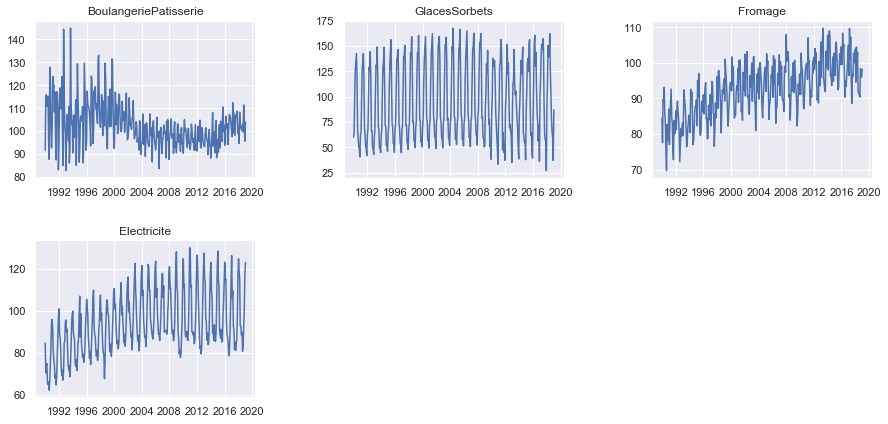

In [4]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,name in enumerate(FolderNames):
    
    X = df.iloc[:,i].dropna()
    ax = fig.add_subplot(4, 3, i+1)
    ax.plot(X)
    ax.set(title=name)

- Boulangerie Patisserie : stationnaire ? Pue du cul
- GlaceSorbets : saisonalité (pic été), pas de tendance déterminisite
- Fromage : tendance, saisonalité ? 
- Electricité : tendance (de plus en plus de technologies gourmandes en énergie) + saisonalité (pic hiver)

# Fonctions d'autocorrélogrammes 

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

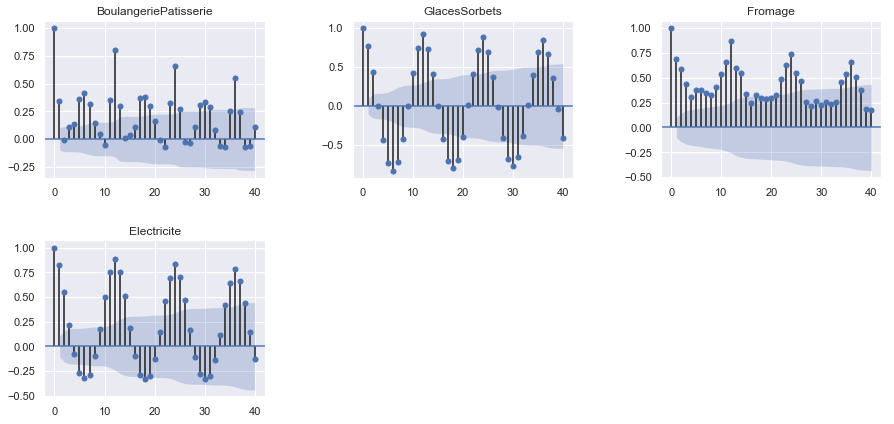

In [6]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,name in enumerate(FolderNames):
    
    ax1 = fig.add_subplot(4,3,i+1)
    fig = plot_acf(df.iloc[:,i].dropna(how="any").values, lags=40, title=name, ax=ax1)

- Boulangerie Patisserie : saisonalité
- GlaceSorbets : saisonalité (pic été), pas de tendance déterminisite
- Fromage : tendance, saisonalité ? 
- Electricité : tendance (de plus en plus de technologies gourmandes en énergie) + saisonalité (pic hiver)

# Electricité

In [7]:
dfE = pd.Series(df.Electricite)

In [10]:
log_dfE = np.log(dfE)

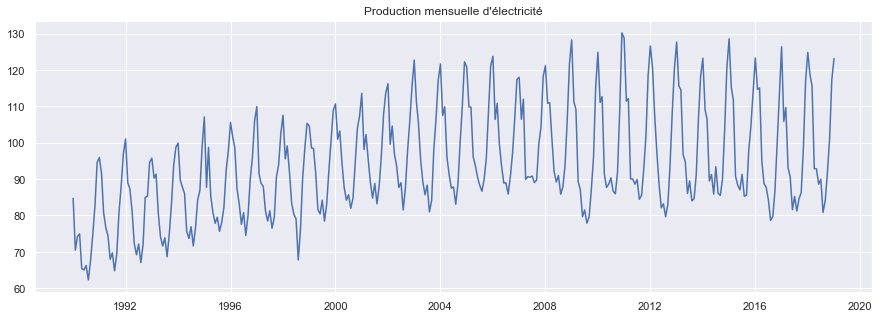

In [15]:
plt.figure(figsize=(15,5))
plt.plot(dfE)
plt.title("Production mensuelle d'électricité")

In [9]:
#plusieurs pics étranges : aout 1998, aout 2009, aout 2012 et aout 2016
dfE[(dfE.index > '1996-01-01') & (dfE.index < '2000-01-01')].sort_values()[0:1]

Libellé
1998-08-01    67.78
Name: Electricite, dtype: float64

## Transformation logarithmique

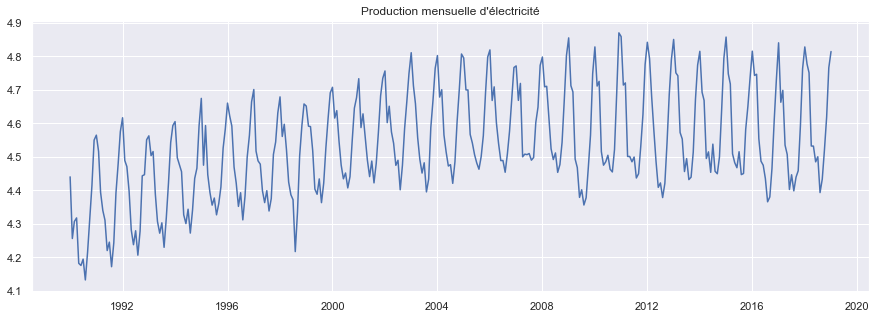

In [17]:
plt.figure(figsize=(15,5))
plt.plot(log_dfE)
plt.title("Production mensuelle d'électricité")

**Commentaires:** La transformation logarithmique permet de corriger certaines formes d'hétéroscédasticité ou de non-linéarité. Dans notre cas, notre série était légèrement hétéroscédastique et la transformation logarithmique a permis de la corriger.<br><br>

On travaillera donc avec la transformation logarithmique.

## Décomposition Trend / Saisonalité / Bruit

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


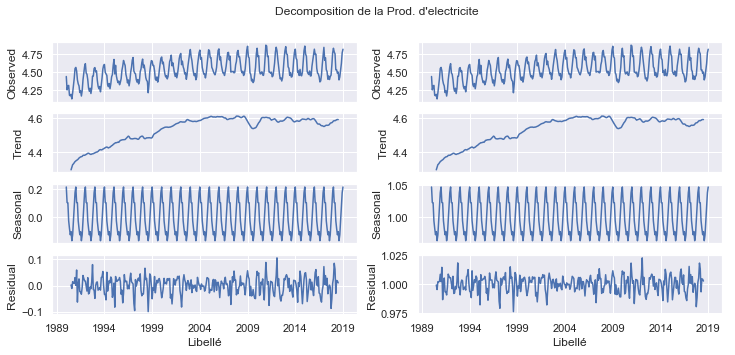

In [20]:
result_add = seasonal_decompose(log_dfE, model='additive')
result_mult = seasonal_decompose(log_dfE, model='multiplicative')

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(result_add, axes[:,0])
plotseasonal(result_mult, axes[:,1])
plt.suptitle("Decomposition de la Prod. d'electricite")
plt.show()


## ACF

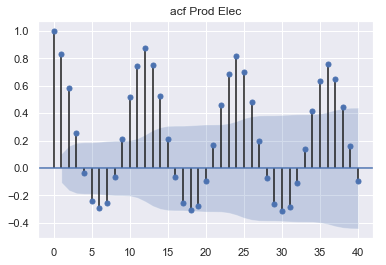

In [96]:
plt.figure(figsize=(10,10))
plot_acf(log_dfE.values, lags=40, title="acf Prod Elec")
plt.show()

In [97]:
log_dfE.values

array([4.81340312, 4.7650757 , 4.61818512, 4.51884948, 4.43271975,
       4.39234818, 4.49936513, 4.48413186, 4.53109298, 4.531416  ,
       4.74996293, 4.7760937 , 4.82711302, 4.76174649, 4.5925914 ,
       4.45759782, 4.43840697, 4.39753082, 4.44558812, 4.40170671,
       4.50612303, 4.53399637, 4.69747586, 4.662023  , 4.83945148,
       4.72897947, 4.60796627, 4.46464295, 4.37939818, 4.36488048,
       4.43426323, 4.47403592, 4.4861614 , 4.55345575, 4.74562754,
       4.74205844, 4.81445819, 4.73461825, 4.65043032, 4.58067255,
       4.44933475, 4.44605721, 4.51436982, 4.46659754, 4.48187197,
       4.50810847, 4.71662211, 4.74675655, 4.85655128, 4.79231343,
       4.64208054, 4.4985867 , 4.44863333, 4.45574167, 4.53699841,
       4.45283452, 4.51393171, 4.49412689, 4.66758145, 4.69180649,
       4.81405253, 4.77305469, 4.67095793, 4.5130549 , 4.43840697,
       4.43117388, 4.4937916 , 4.45516092, 4.5522967 , 4.57171681,
       4.7410987 , 4.74987641, 4.84944881, 4.79023797, 4.68564

In [99]:
log_dfE_diff.values

array([0.12447552116055771, 0.2601352912756738, 0.08700013844592025,
       0.022297909113998315, 0.128841266774109, 0.04451193365730788,
       0.05074991455168476, 0.039510923496068884, 0.028129815106998635,
       0.07897992607828197, 0.06465194483190206, 0.025275496955913468,
       0.05188717741005355, -0.027277442401326013, 0.0768328295502041,
       0.057303381295009004, -0.0290270430460966, 0.017495707972351227,
       0.033982825863761335, 0.03443647057621657, 0.03502193559615119,
       0.0514295586413116, -0.0334440763449777, -0.02421830265087266,
       -0.05397377180300644, 0.014507563896582809, 0.04499416043046356,
       -0.008041114645724434, 0.02512420517367797, 0.03437838550812877,
       0.023701362908836288, 0.02343339117589771, 0.04012233266159804,
       -0.022491577009775554, 0.09598161761231339, 0.04230863195322687,
       0.04252915268417112, -0.0064466156349505255, -0.03894494949411964,
       0.06631467232136767, 0.020024697947283343, 0.028496662928202632,
  

**Commentaires:** On observe une saisonalité annuelle (pic tous les 12 mois).

## PACF

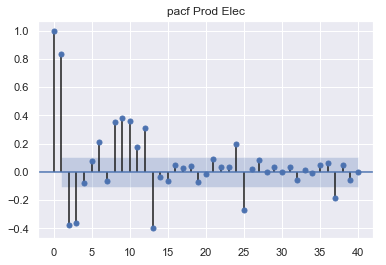

In [24]:
plt.figure(figsize=(10,10))
plot_pacf(log_dfE.values, lags=40, title="pacf Prod Elec")
plt.show()

## Désaisonnalisation 

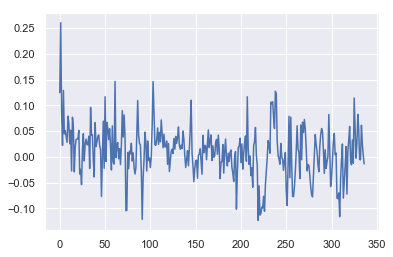

In [25]:
series = pd.Series(log_dfE) 
X = series.values[::-1]
diff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    diff.append(value)
plt.plot(diff)
plt.show()


In [67]:
## Garder les dates

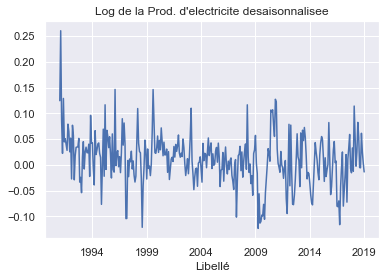

In [108]:
series = pd.Series(log_dfE) 
X = series.values[::-1]
log_dfE_diff = pd.DataFrame(index=series.index[-13::-1], columns=[""])
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    log_dfE_diff.iloc[i-12,] = value

log_dfE_diff.plot(title="Log de la Prod. d'electricite desaisonnalisee", legend=False)

### ACF aprés désaisonnalisation 

In [124]:
log_dfE_diff = pd.Series(log_dfE_diff[""].astype("float"))

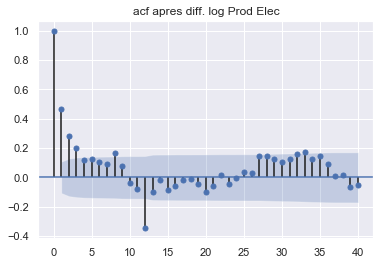

In [107]:
plt.figure(figsize=(10,10))
plot_acf(log_dfE_diff.values, lags=40, title="acf apres diff. log Prod Elec")
plt.show()

### PACF aprés désaisonnalisation 

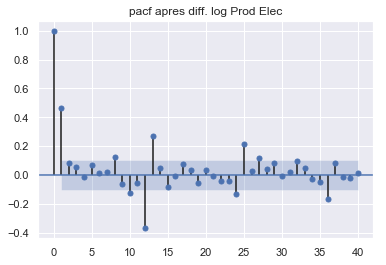

In [109]:
plt.figure(figsize=(10,10))
plot_pacf(log_dfE_diff.values, lags=40, title="pacf apres diff. log Prod Elec")
plt.show()

**Commentaires:** Il reste encore des autocorrélations partielles et totales significatives mais cela vaut-il le coup de désaisonnaliser encore une fois ?

## Suppression tendance linéaire + désaisonnalisation

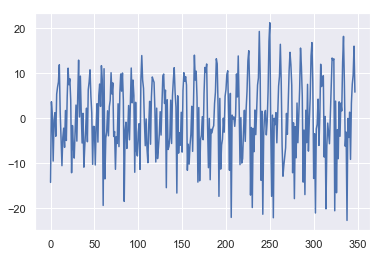

In [131]:
series = pd.Series(dfE) 
X = series.values[::-1]
diff1 = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff1.append(value)
plt.plot(diff1)
plt.show()

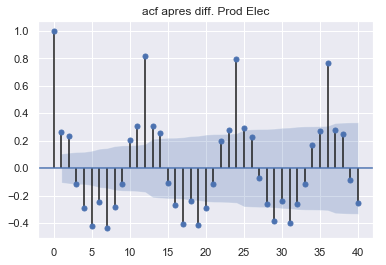

In [132]:
plt.figure(figsize=(10,10))
plot_acf(diff1, lags=40, title="acf apres diff. Prod Elec")
plt.show()

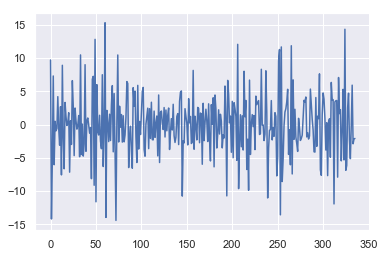

In [133]:
diff2 = list()
for i in range(12, len(diff1)):
    value = diff1[i] - diff1[i - 12]
    diff2.append(value)
plt.plot(diff2)
plt.show()

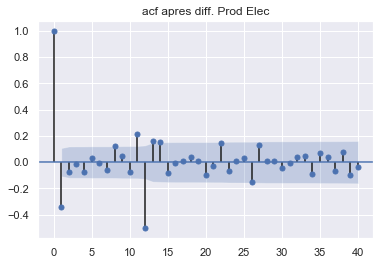

In [134]:
plt.figure(figsize=(10,10))
plot_acf(diff2, lags=40, title="acf apres diff. Prod Elec")
plt.show()

## Test de racine unitaire

Valider nos transformations de données et vérifier la stationnarité.

In [113]:
from statsmodels.tsa.stattools import adfuller

On teste la présence d'une racine unitaire dans les données brutes et en logarithme en prenant comme spécification un modèle avec une constante et un trend.

In [129]:
result = adfuller(dfE, regression='ct')
print('ADF Statistic for elec prod without modification : %f' % result[0])
print('p-value for elec prod  %f' % result[1])

ADF Statistic for elec prod without modification : -0.044377
p-value for elec prod  0.993755


In [130]:
result = adfuller(log_dfE, regression='ct')
print('ADF Statistic for elec prod without modification : %f' % result[0])
print('p-value for elec prod  %f' % result[1])

ADF Statistic for elec prod without modification : 0.433220
p-value for elec prod  0.996707


Dans les deux cas, on ne rejette pas l'hypothèse nulle que notre série présente une racine unitaire.

On teste de nouveau sur les données désaisonnalisées (et toujours en logarithme) en prenant cette fois un modèle avec une spécification sans constante ni trend.

In [127]:
result = adfuller(log_dfE_diff, regression='nc')
print('ADF Statistic for elec prod without seasonality : %f' % result[0])
print('p-value for elec prod  %f' % result[1])

ADF Statistic for elec prod without seasonality : -5.238181
p-value for elec prod  0.000000


On rejette l'hypothèse de racine unitaire dans ce cas-ci. 

On parvient à la même conclusion avec les données détrendées puis désaisonnalisées:

In [135]:
result = adfuller(diff2, regression='nc')
print('ADF Statistic for elec prod without seasonality and tred : %f' % result[0])
print('p-value for elec prod  %f' % result[1])

ADF Statistic for elec prod without seasonality and tred : -7.497210
p-value for elec prod  0.000000


## Comparaison et validations de différents modèles

### Modèles ARMA

#### Première intuition de l'ordre adéquat avec les autocorrélogrammes totaux et partiels

#### Sélectionner le meilleur modèle - critères de l'AIC et du BIC

In [147]:
from statsmodels.tsa.arima_model import ARIMA

In [163]:
import warnings
warnings.filterwarnings("ignore")

La fonction ci-dessous teste plusieurs spécifications d'un modèle ARIMA (selon l'ordre p, d, q) et indique en sortie la meilleure spécification selon les critères de l'AIC et du BIC :

In [164]:
def evaluate_arima_ic(dataset, p_values, d_values, q_values):
    
    X = dataset.values.astype('float32')
    
    best_aic, best_bic, best_cfg_1, best_cfg_2 = float("inf"), float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(X, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    bic = model_fit.bic
                    if aic < best_aic:
                        best_aic, best_cfg_1 = aic, order
                    if bic < best_bic:
                        best_bic, best_cfg_2 = bic, order
                except:
                    continue
    print('Best ARIMA: %s AIC = %.3f' % (best_cfg_1, best_aic))
    print('Best ARIMA: %s BIC = %.3f' % (best_cfg_2, best_bic))
    return best_cfg_1, best_cfg_2

In [151]:
p_values = [0, 1, 2, 3, 4, 5]
d_values = [0]
q_values = [0, 1, 2, 3, 4, 5]

In [166]:
evaluate_arima_ic(log_dfE_diff, p_values, d_values, q_values)

Best ARIMA: (5, 0, 4) AIC = -1193.249
Best ARIMA: (5, 0, 4) BIC = -1151.228


((5, 0, 4), (5, 0, 4))

In [186]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import acorr_ljungbox

La fonction ci-dessous retourne pour n'importe quel ordre renseigné (p,d,q) un tableau avec les sorties statistiques du modèle (significativité des coefficients, critères d'infos, etc.), une étude graphique (densité, qq-plot, acf, pacf) et statistique (test portmanteau) des résidus :

In [189]:
def model_arima(dataset, ordre):
    
    X = dataset.values.astype('float32')

    p = ordre[0]
    q = ordre[2]
    
    arma_model = ARIMA(X, order=ordre)
    arma_model_fit = arma_model.fit()
    
    # Sortie : significativité des coefficients
    
    print(arma_model_fit.summary())
    
    # Etude des résidus
    
    predictions = arma_model_fit.predict()
    residuals = [X[i]-predictions[i] for i in range(len(X))]
    residuals_df = pd.DataFrame(residuals)
    
    # Graphique des résidus
    
    fig = plt.figure(figsize=(12,4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    plt.subplot(131)
    residuals_df.hist(ax=plt.gca())
    plt.suptitle("Etude des résidus")
    plt.subplot(132)
    residuals_df.plot(kind='kde', ax=plt.gca(), legend=False)
    plt.subplot(133)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.show()
    
    plot_acf(residuals, lags=40, title="acf residuals")
    plot_pacf(residuals, lags=40, title="pacf residuals")
    
    
    # Test Port-Manteau - Statistique Ljung-box
    
    print(acorr_ljungbox(residuals, lags=40))
    
    # Note : en sortie de acorr_ljungbox() on a les corrélations et les p-values pour le nombre de lag renseigné

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  337
Model:                     ARMA(5, 4)   Log Likelihood                 607.625
Method:                       css-mle   S.D. of innovations              0.039
Date:                Mon, 08 Apr 2019   AIC                          -1193.249
Time:                        15:56:33   BIC                          -1151.228
Sample:                             0   HQIC                         -1176.500
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0112      0.006      2.012      0.045       0.000       0.022
ar.L1.y        1.0384      0.061     16.889      0.000       0.918       1.159
ar.L2.y       -0.2686      0.072     -3.715      0.0

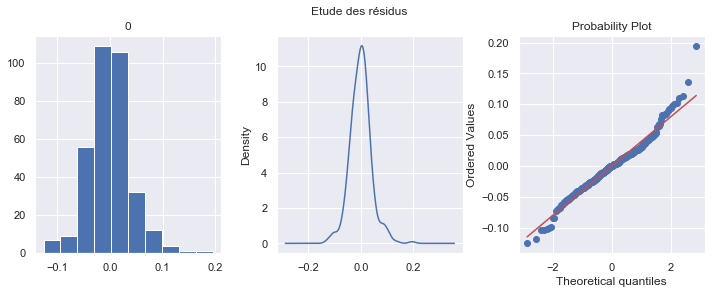

(array([2.56157546e-03, 2.21583569e+00, 3.81204693e+00, 5.44714466e+00,
       8.74810634e+00, 9.08777725e+00, 9.08817481e+00, 9.13213273e+00,
       1.03593204e+01, 1.04993726e+01, 1.21245382e+01, 5.18293737e+01,
       5.40310399e+01, 5.82928714e+01, 5.89109051e+01, 6.39869113e+01,
       6.40321130e+01, 6.54908569e+01, 6.75268314e+01, 6.89884972e+01,
       6.90910382e+01, 7.01034130e+01, 7.04192327e+01, 7.04228082e+01,
       7.04816141e+01, 7.15584998e+01, 7.30074608e+01, 7.37580970e+01,
       7.49055543e+01, 7.56815426e+01, 7.66322592e+01, 8.04626446e+01,
       8.20560193e+01, 8.22423438e+01, 8.61881153e+01, 8.63184400e+01,
       8.73672450e+01, 8.82226745e+01, 9.07155261e+01, 9.26094881e+01]), array([9.59634693e-01, 3.30245869e-01, 2.82487977e-01, 2.44414721e-01,
       1.19543085e-01, 1.68701390e-01, 2.46387320e-01, 3.31272391e-01,
       3.22186800e-01, 3.97825794e-01, 3.54355294e-01, 6.64647496e-07,
       5.97305545e-07, 2.33213908e-07, 3.87757949e-07, 1.09959953e-07,
   

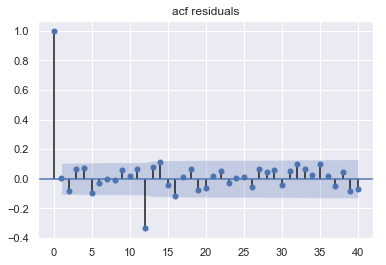

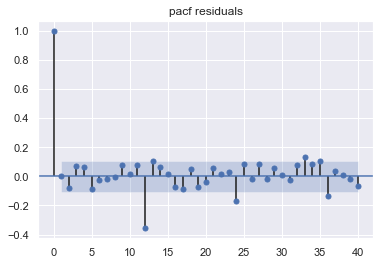

In [188]:
model_arima(log_dfE_diff,(5,0,4))

### Modèles SARIMA

Cette fonction fait la amême chose que la fonction précédente mais pour un modèle SARIMA spécifiée.

In [192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [197]:
def evaluate_sarima_ic(dataset, p_values, d_values, q_values, seasonal_order):
    
    X = dataset.values.astype('float32')
    
    best_aic, best_bic, best_cfg_1, best_cfg_2 = float("inf"), float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = SARIMAX(X, order=order, seasonal_order=seasonal_order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    bic = model_fit.bic
                    if aic < best_aic:
                        best_aic, best_cfg_1 = aic, order
                    if bic < best_bic:
                        best_bic, best_cfg_2 = bic, order
                except:
                    continue
    print('Best ARIMA: %s AIC = %.3f' % (best_cfg_1, best_aic))
    print('Best ARIMA: %s BIC = %.3f' % (best_cfg_2, best_bic))
    return best_cfg_1, best_cfg_2

In [200]:
evaluate_sarima_ic(log_dfE,  p_values, d_values, q_values, (1,1,1,12))

Best ARIMA: (1, 0, 2) AIC = -1305.126
Best ARIMA: (1, 0, 2) BIC = -1281.995


((1, 0, 2), (1, 0, 2))

In [203]:
def model_sarima(dataset, ordre, seasonal_order):
    
    X = dataset.values.astype('float32')

    p = ordre[0]
    q = ordre[2]
    
    sarima_model = SARIMAX(X, order=ordre, seasonal_order=seasonal_order)
    sarima_model_fit = sarima_model.fit()
    
    # Sortie : significativité des coefficients
    
    print(sarima_model_fit.summary())
    
    # Etude des résidus
    
    predictions = sarima_model_fit.predict()
    residuals = [X[i]-predictions[i] for i in range(len(X))]
    residuals_df = pd.DataFrame(residuals)
    
    # Graphique des résidus
    
    fig = plt.figure(figsize=(12,4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    plt.subplot(131)
    residuals_df.hist(ax=plt.gca())
    plt.suptitle("Etude des résidus")
    plt.subplot(132)
    residuals_df.plot(kind='kde', ax=plt.gca(), legend=False)
    plt.subplot(133)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.show()
    
    plot_acf(residuals, lags=40, title="acf residuals")
    plot_pacf(residuals, lags=40, title="pacf residuals")
    

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  337
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                 574.844
Date:                            Mon, 08 Apr 2019   AIC                          -1139.689
Time:                                    16:10:42   BIC                          -1120.588
Sample:                                         0   HQIC                         -1132.076
                                            - 337                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7338      0.071     10.296      0.000       0.594       0.873
ma.L1         -0.2507      0.090   

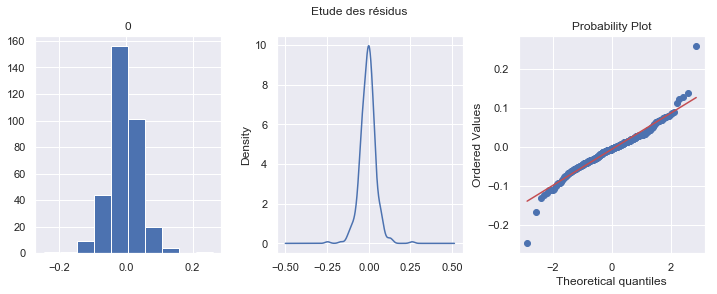

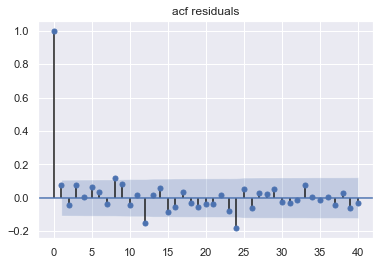

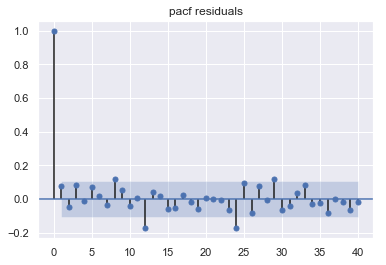

In [205]:
model_sarima(log_dfE_diff, (1,0,1), (1,1,1,12))

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  349
Model:             SARIMAX(1, 0, 2)x(1, 1, 1, 12)   Log Likelihood                 658.563
Date:                            Mon, 08 Apr 2019   AIC                          -1305.126
Time:                                    16:16:00   BIC                          -1281.995
Sample:                                         0   HQIC                         -1295.918
                                            - 349                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9743      0.018     55.059      0.000       0.940       1.009
ma.L1         -0.4779      0.054   

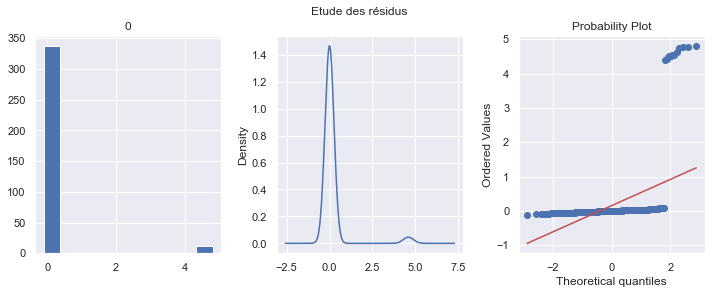

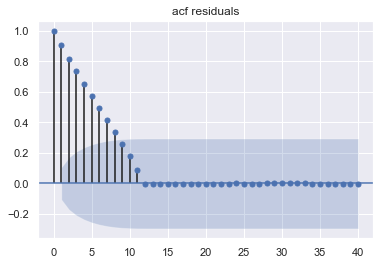

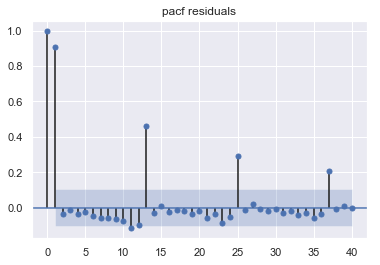

In [207]:
model_sarima(log_dfE, (1,0,2), (1,1,1,12))

**Commentaires** : Contradiction entre les analyses graphiques et les résultats de la statistique de Ljung-Box... À Revoir !!